## Movie Ratings Analysis

Analyze a dataset of movie ratings. Perform EDA to find trends in ratings, the distribution of genres, and correlations between different variables. Create visualizations like histograms, scatter plots, and box plots to communicate your findings.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Unzipping the file
with zipfile.ZipFile('Movie Ratings.zip', 'r') as zip_ref:
    zip_ref.extractall('Movie_Ratings')

# Get list of all files in the extracted folder
file_list = os.listdir('Movie_Ratings')

# Load the first CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Movie_Ratings/{csv_file}')

# Display the first few rows to inspect the data
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [5]:
# Initial Data Exploration

# Check the basic information and data types of each column
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# View basic statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check for duplicate movie titles if there's a column for 'Title'
if 'Title' in df.columns:
    title_duplicates = df[df['Title'].duplicated()]
    print(f"\nNumber of duplicate movie titles: {len(title_duplicates)}")


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   

In [7]:
# Clean Data

# Fill missing values for 'homepage', 'overview', and 'tagline'
df['homepage'].fillna('Not Available', inplace=True)
df['overview'].fillna('Not Available', inplace=True)
df['tagline'].fillna('Not Available', inplace=True)

# Fill missing values for 'runtime' with the median
df['runtime'].fillna(df['runtime'].median(), inplace=True)

# Drop rows with missing 'release_date'
df.dropna(subset=['release_date'], inplace=True)

In [9]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Parse JSON-like columns for easier analysis
import ast

# Convert 'genres', 'keywords', and 'spoken_languages' to lists of dictionaries
json_columns = ['genres', 'keywords', 'spoken_languages']
for col in json_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [11]:
# Feature Engineering

# Extract year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Extract genres as a list of genre names
df['genre_list'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])

In [ ]:
# Prepare for Analysis

# You might want to one-hot encode the genre_list or original_language columns to facilitate analysis.
# Additionally, dropping columns like homepage or tagline if they are not relevant for the analysis is also an option.

In [13]:
#  One-Hot Encode genre_list and original_language

# One-hot encode 'genre_list'
df_exploded = df.explode('genre_list')  # Expand the genres so each genre is in a separate row
df_exploded.reset_index(drop=True, inplace=True)  # Reset the index to avoid issues with duplicated indexes

# Generate dummy variables for the expanded 'genre_list'
genre_dummies = pd.get_dummies(df_exploded['genre_list'], prefix='genre')

# Combine the expanded DataFrame with the new genre columns
df_exploded = pd.concat([df_exploded, genre_dummies], axis=1)

# Drop duplicate genres if you want to go back to the original DataFrame format
df = df_exploded.groupby(df_exploded.index).first()  # Collapse the exploded rows, keeping first occurrences of columns

# One-hot encode 'original_language'
language_dummies = pd.get_dummies(df['original_language'], prefix='language')
df = pd.concat([df, language_dummies], axis=1)

# Display updated DataFrame information
print("\nUpdated Data Types and Non-Null Counts After One-Hot Encoding:\n")
print(df.info())


Updated Data Types and Non-Null Counts After One-Hot Encoding:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12187 entries, 0 to 12186
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   budget                 12187 non-null  int64         
 1   genres                 12187 non-null  object        
 2   homepage               12187 non-null  object        
 3   id                     12187 non-null  int64         
 4   keywords               12187 non-null  object        
 5   original_language      12187 non-null  object        
 6   original_title         12187 non-null  object        
 7   overview               12187 non-null  object        
 8   popularity             12187 non-null  float64       
 9   production_companies   12187 non-null  object        
 10  production_countries   12187 non-null  object        
 11  release_date           12187 non-null  datetime64[ns]


In [15]:
# Drop less relevant columns
columns_to_drop = ['homepage', 'tagline', 'overview', 'genres', 'keywords', 'spoken_languages']
df.drop(columns=columns_to_drop, inplace=True)

# Display updated DataFrame information
print("\nUpdated Data Types and Non-Null Counts After Dropping Columns:\n")
print(df.info())


Updated Data Types and Non-Null Counts After Dropping Columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12187 entries, 0 to 12186
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   budget                 12187 non-null  int64         
 1   id                     12187 non-null  int64         
 2   original_language      12187 non-null  object        
 3   original_title         12187 non-null  object        
 4   popularity             12187 non-null  float64       
 5   production_companies   12187 non-null  object        
 6   production_countries   12187 non-null  object        
 7   release_date           12187 non-null  datetime64[ns]
 8   revenue                12187 non-null  int64         
 9   runtime                12187 non-null  float64       
 10  status                 12187 non-null  object        
 11  title                  12187 non-null  object        


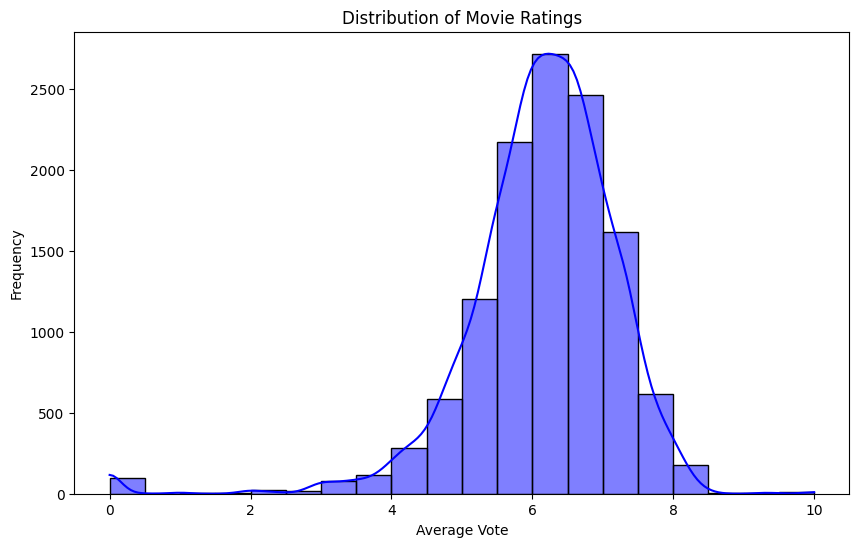

In [17]:
# Visualization

plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True, color='blue')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

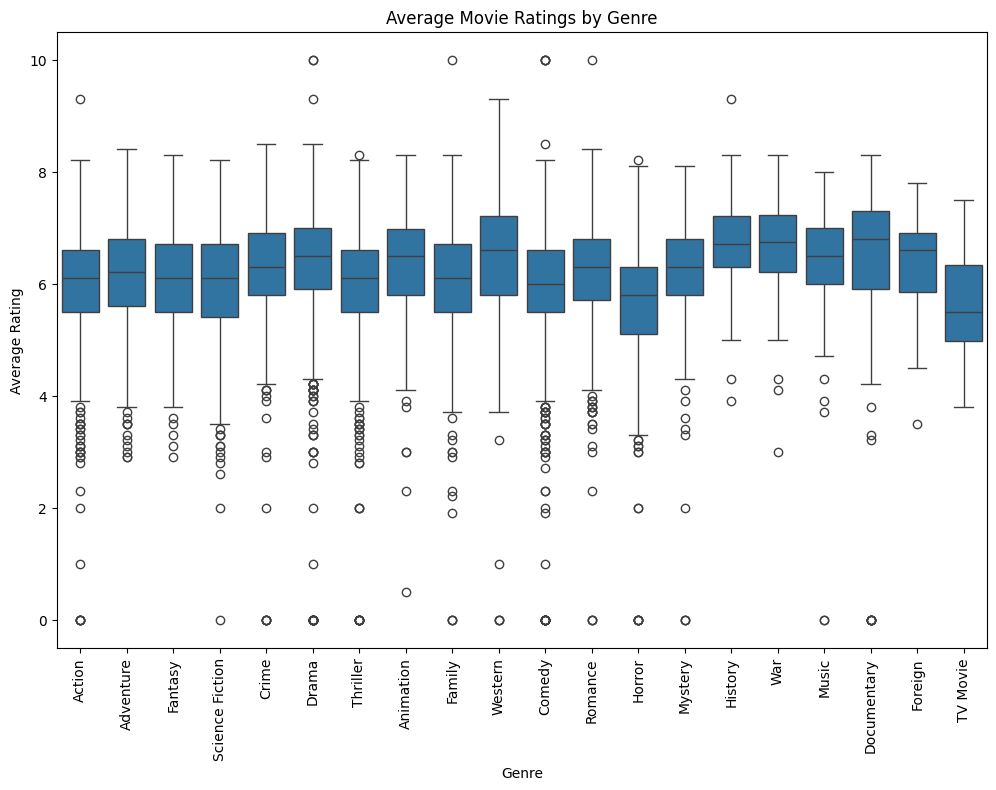

In [19]:
# Explode 'genre_list' to create multiple rows per movie for each genre
df_exploded = df.explode('genre_list')

# Boxplot of ratings by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_exploded, x='genre_list', y='vote_average')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings by Genre')
plt.show()

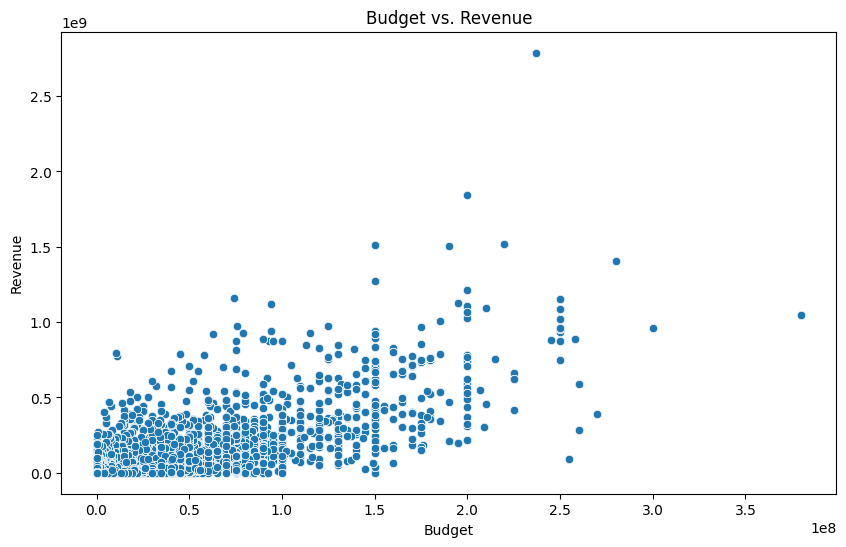

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()

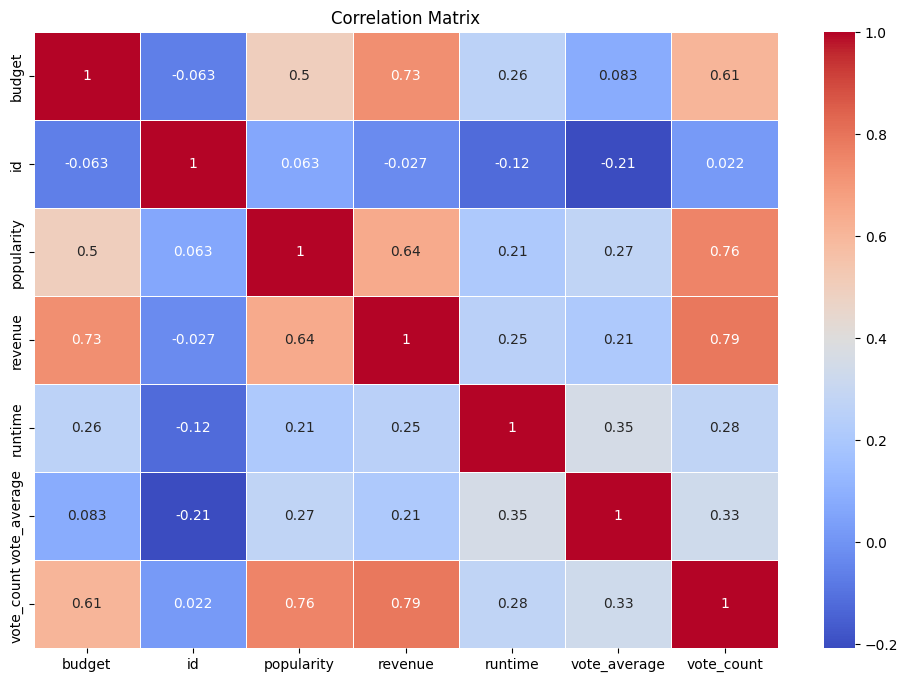

In [23]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

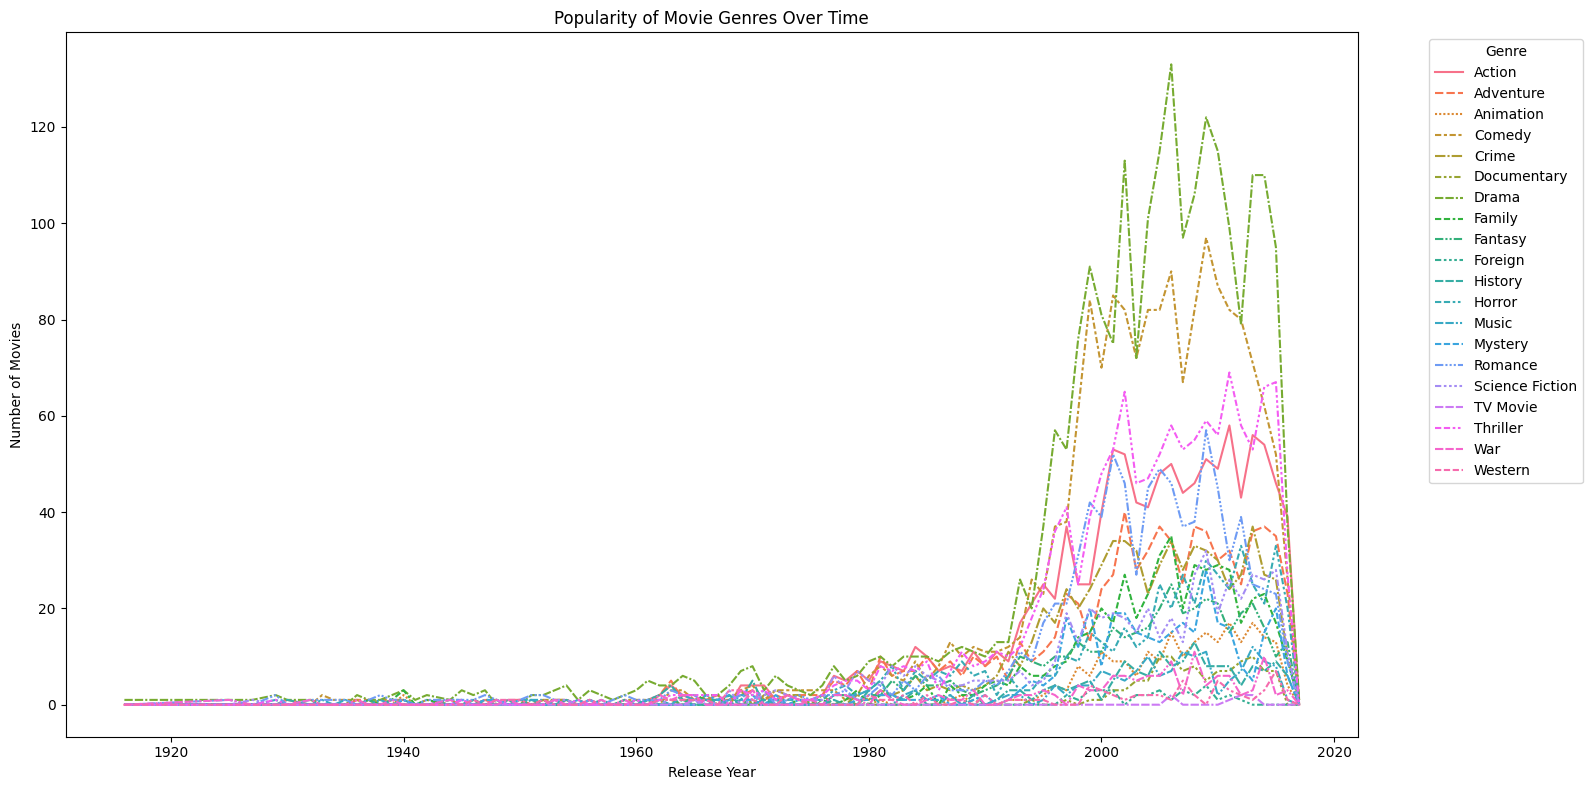

In [25]:
# Additional Analysis Code

# Group data by release year and genre to count the number of movies in each genre per year
genre_trends = df_exploded.groupby(['release_year', 'genre_list']).size().reset_index(name='Count')

# Pivot the data to make it suitable for a line plot
genre_pivot = genre_trends.pivot(index='release_year', columns='genre_list', values='Count').fillna(0)

# Plot genre popularity over time
plt.figure(figsize=(16, 8))
sns.lineplot(data=genre_pivot)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Popularity of Movie Genres Over Time')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_22488\1999827327.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x='production_company_list', y='revenue', palette='viridis')


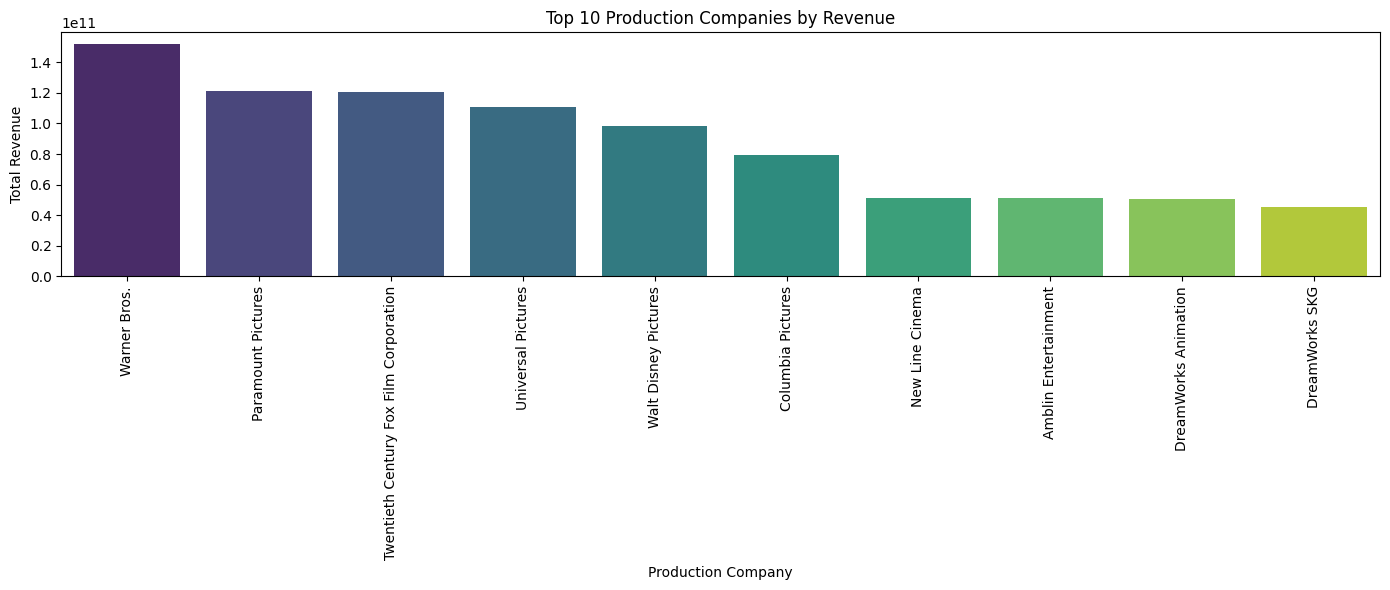

In [27]:
# Parse 'production_companies' as lists of dictionaries
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Extract production company names
df['production_company_list'] = df['production_companies'].apply(lambda x: [comp['name'] for comp in x])

# Explode the production company list to create multiple rows for each production company
df_companies = df.explode('production_company_list')

# Group by production company and calculate total revenue
top_companies = df_companies.groupby('production_company_list')['revenue'].sum().reset_index()
top_companies = top_companies.sort_values(by='revenue', ascending=False).head(10)

# Plot the top production companies by revenue
plt.figure(figsize=(14, 6))
sns.barplot(data=top_companies, x='production_company_list', y='revenue', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Total Revenue')
plt.title('Top 10 Production Companies by Revenue')
plt.tight_layout()
plt.show()

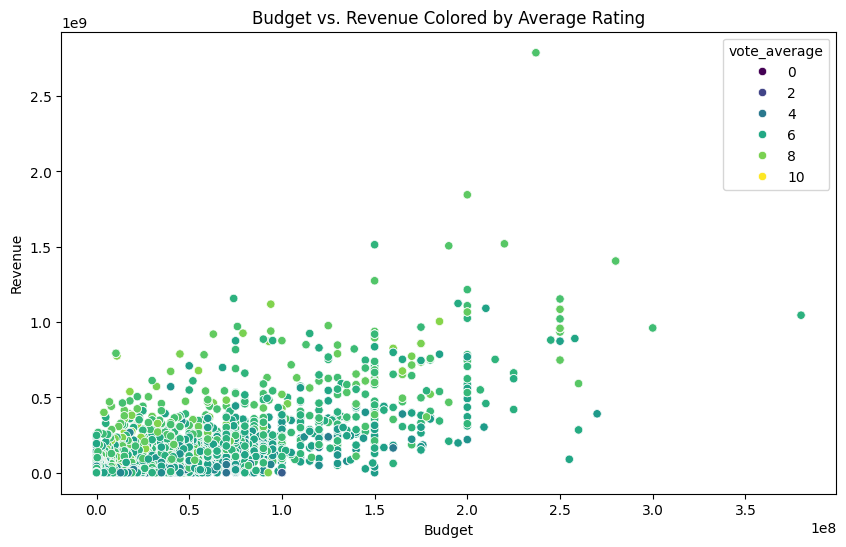

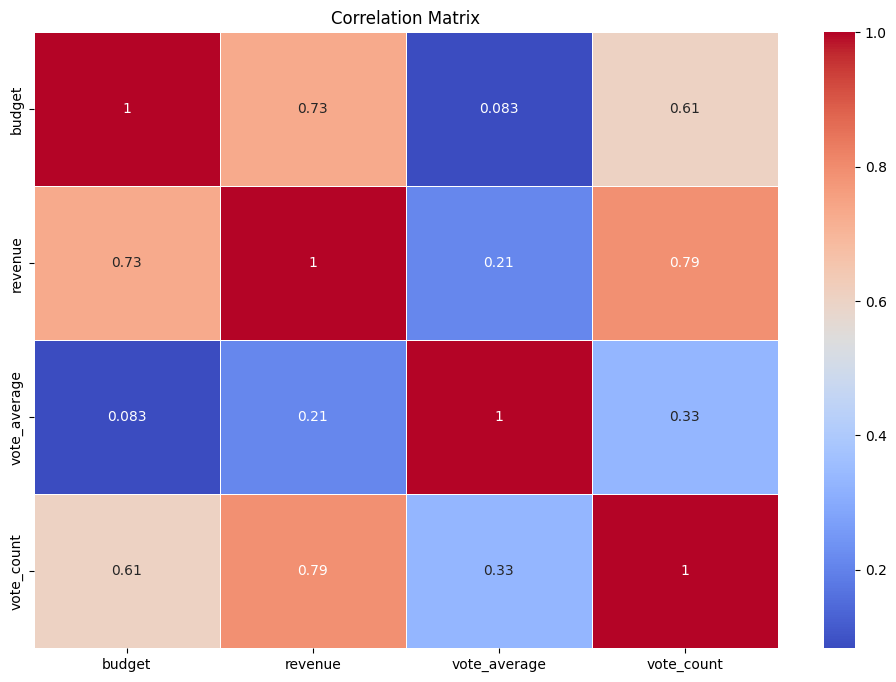

In [29]:
# Scatter plot: Budget vs. Revenue colored by rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='vote_average', palette='viridis')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue Colored by Average Rating')
plt.show()

# Check correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[['budget', 'revenue', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_22488\3479174985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre, x='genre_list', y='vote_average', palette='magma')


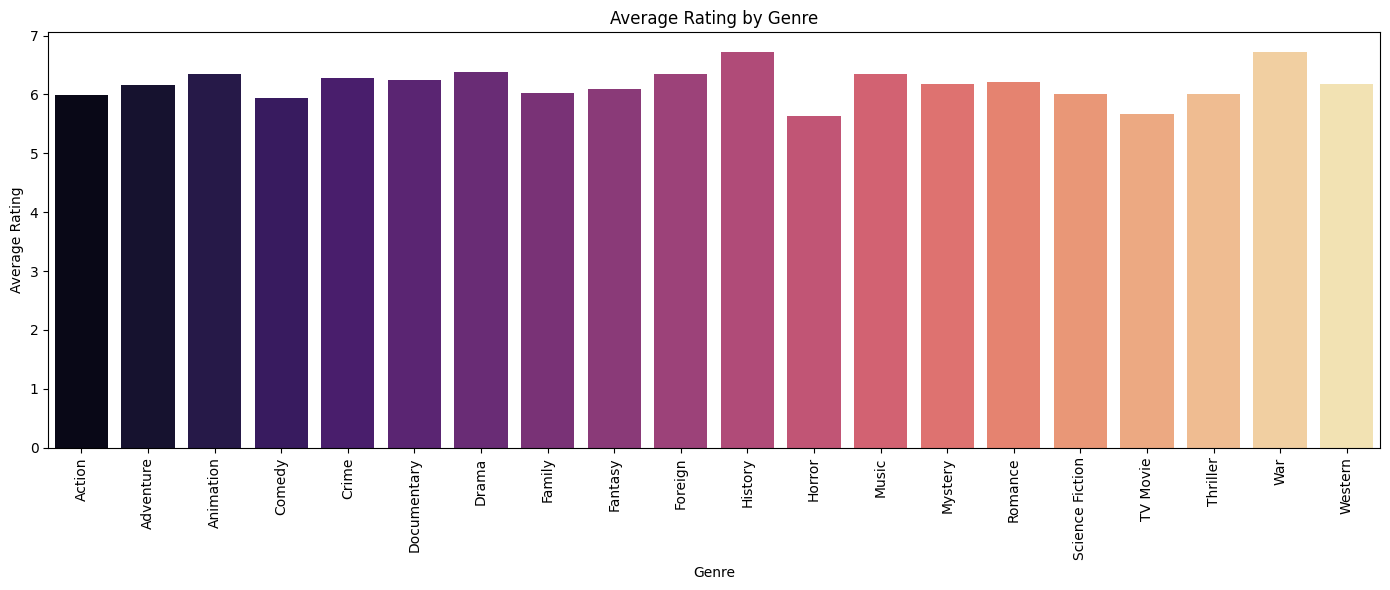

In [31]:
# Group by genre and calculate average rating
average_rating_by_genre = df_exploded.groupby('genre_list')['vote_average'].mean().reset_index()

# Plot average rating by genre
plt.figure(figsize=(14, 6))
sns.barplot(data=average_rating_by_genre, x='genre_list', y='vote_average', palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.tight_layout()
plt.show()

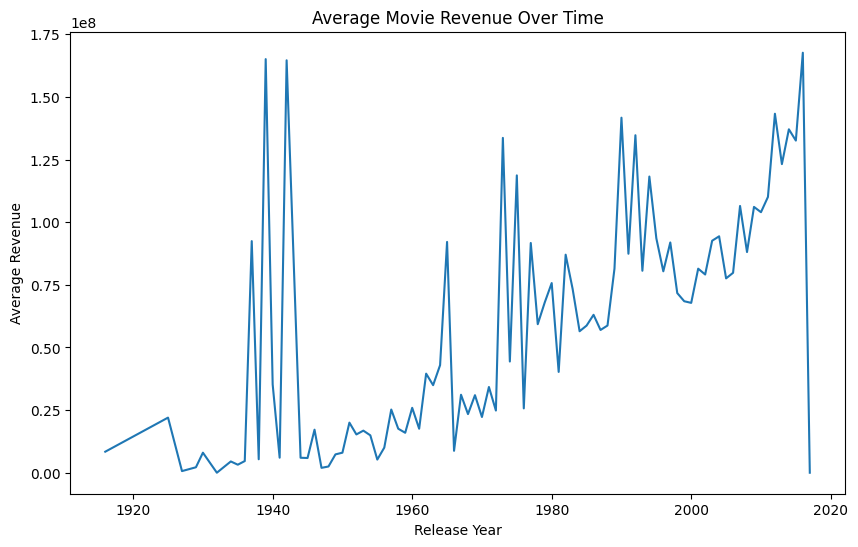

In [33]:
# Group by release year and calculate average revenue
average_revenue_per_year = df.groupby('release_year')['revenue'].mean().reset_index()

# Plot average revenue per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_revenue_per_year, x='release_year', y='revenue')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue Over Time')
plt.show()